<a href="https://colab.research.google.com/github/Jahdar49/Churn-rate-/blob/main/Jahmel_Yorke_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Churn rate dataset
# Dataset based off of information about employees at a bank. The information provided helps determine the chances of an employee staying at the company or leaving.
# Key questions: Are the employees at the bank content with working at the bank based off of these statistics, does gender play a role in overall compensation, is geography a factor.
# Will utilize various charts to draw hypothesis
# Main question is how invested are the employees in this company


# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Dataset import
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

# Used to display plots
%matplotlib inline

# Understanding the data using info method
# Renamed column "Exited" to "Resigned" for readability purposes
# Set index to "RowNumber"
# If Resigned: Resigned = 1, Else: Resigned = 0
# Dataset appears to consist of 3 regions, France, Spain, and Germany

df.info()
print('------')
df.set_index("RowNumber", inplace=True)
df.head(20)
df.rename(columns={"Exited": "Resigned"})


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Resigned
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [116]:
# Cleaning the data
# Data is clean with zero null values
# Datatypes correlate with columns, no need to convert
# Drop unessessary columns

print('Null Values by Column:')
print(df.isnull().sum().sort_values(ascending=False), '\n')
df.drop(columns = ["CreditScore", "NumOfProducts", "CreditScore", "HasCrCard"])


Null Values by Column:
Exited             0
EstimatedSalary    0
IsActiveMember     0
HasCrCard          0
NumOfProducts      0
Balance            0
Tenure             0
Age                0
Gender             0
Geography          0
CreditScore        0
Surname            0
CustomerId         0
RowNumber          0
dtype: int64 



,RowNumber,CustomerId,Surname,Geography,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,France,Female,42,2,0.00,1,101348.88,1
1,2,15647311,Hill,Spain,Female,41,1,83807.86,1,112542.58,0
2,3,15619304,Onio,France,Female,42,8,159660.80,0,113931.57,1
3,4,15701354,Boni,France,Female,39,1,0.00,0,93826.63,0
4,5,15737888,Mitchell,Spain,Female,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,France,Male,39,5,0.00,0,96270.64,0
9996,9997,15569892,Johnstone,France,Male,35,10,57369.61,1,101699.77,0
9997,9998,15584532,Liu,France,Female,36,7,0.00,1,42085.58,1
9998,9999,15682355,Sabbatini,Germany,Male,42,3,75075.31,0,92888.52,1


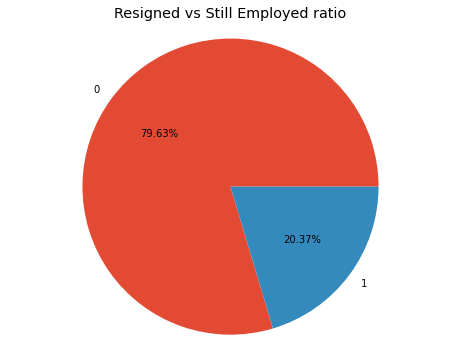

In [ ]:
# Analyze data
# Red means the employee stayed, blue means the employee left
# Statistics based off the dataset indicate a 20% employee churn rate.

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use('ggplot')
df['Exited'].value_counts().head().plot.pie(autopct='%1.2f%%')
plt.title('Resigned vs Still Employed ratio')
plt.ylabel(None)
plt.axis('equal')
plt.show()

# New Section

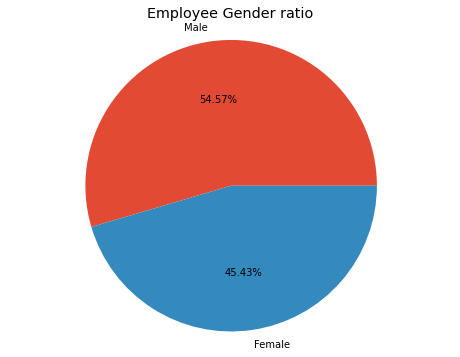

In [102]:
# Create pie chart to show how many employees are male and how many employees are female
# From experince working in banks, women bankers sometimes make less than male bankers, could influence higher resignation rate
# Gender variation among employees at around 9%


plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 10
plt.style.use('ggplot')
df['Gender'].value_counts().head().plot.pie(autopct='%1.2f%%')
plt.title('Employee Gender ratio')
plt.ylabel(None)
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Salaries')

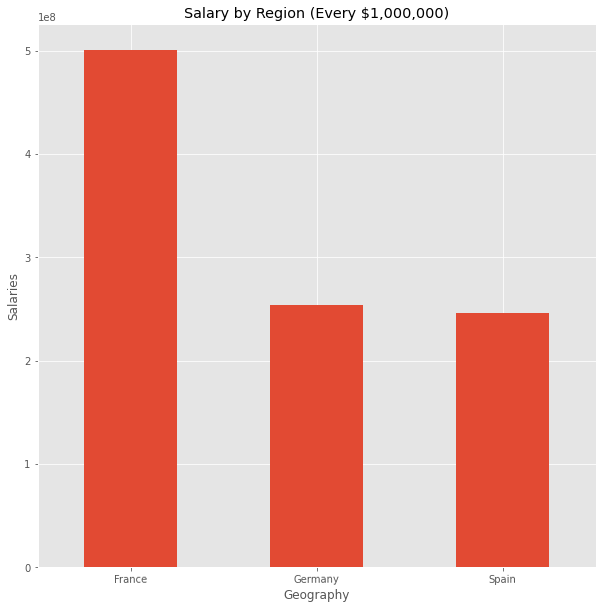

In [ ]:
# Create bar chart to calculate sum of every employee's salary within specific region. 
# Statistics help showcase total employee compensation and how they differentiate between regions
# France has the highest income ratio as well as the greatest number of employees based on these statistics, indicating this bank is more attractive there

fig, ax = plt.subplots(figsize=(10, 10))
grouped_data = df.groupby('Geography').sum().sort_values('EstimatedSalary', ascending = False)['EstimatedSalary']
grouped_data.plot(ax = ax, kind = 'bar')
plt.xticks(rotation=.5, horizontalalignment="center")
plt.title('Salary by Region (Every $1,000,000)')
plt.ylabel("Salaries")
# Create a sample dataframe with an text index


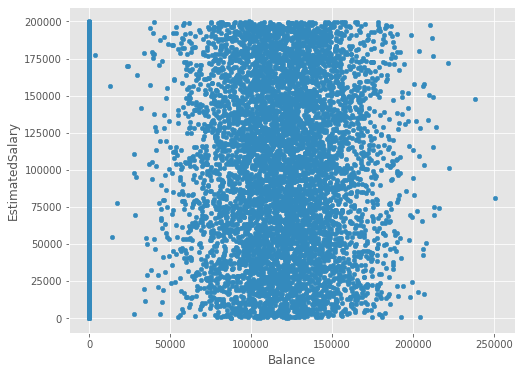

In [112]:
# Create scatterplot to showcase correlation between how much employees make yearly and how much money they have in their bank account.
# Statistics show bankers with a salary of six figues or more have around $100,000 to $150,000 in their bank account indicated they are rather well off financially.
# Higher wages as well as more money saved in the bank makes an employee less likey to resign
# This concludes my analysis on churn data.

df.plot.scatter(x='Balance', y='EstimatedSalary')
